# Cluster Analysis

# EDA

## Loading Data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [8]:
df[df.duplicated]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size


In [11]:
df = df.drop('ID', axis=1)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


## Skewness and Kurtosis

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
num_cols = ['Age', 'Income']
cat_cols =  ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

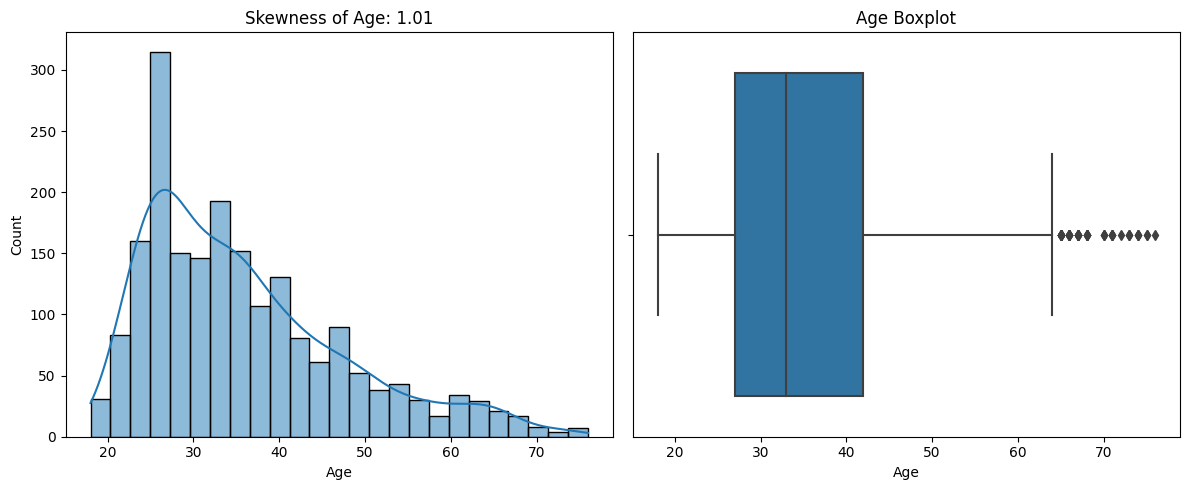

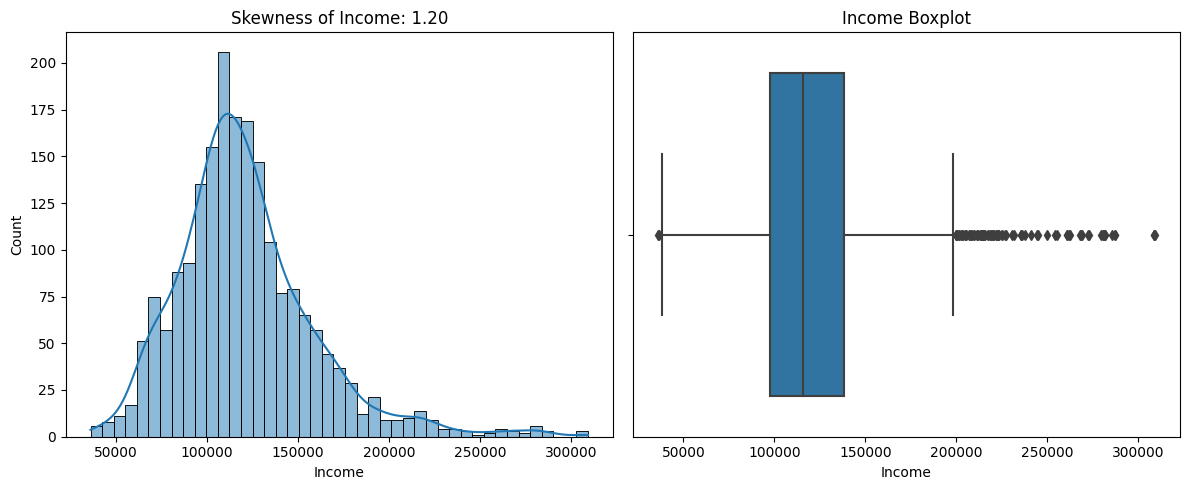

In [31]:
for col in num_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Skewness of {col}: {df[col].skew():.2f}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    
    plt.tight_layout()
    plt.show()


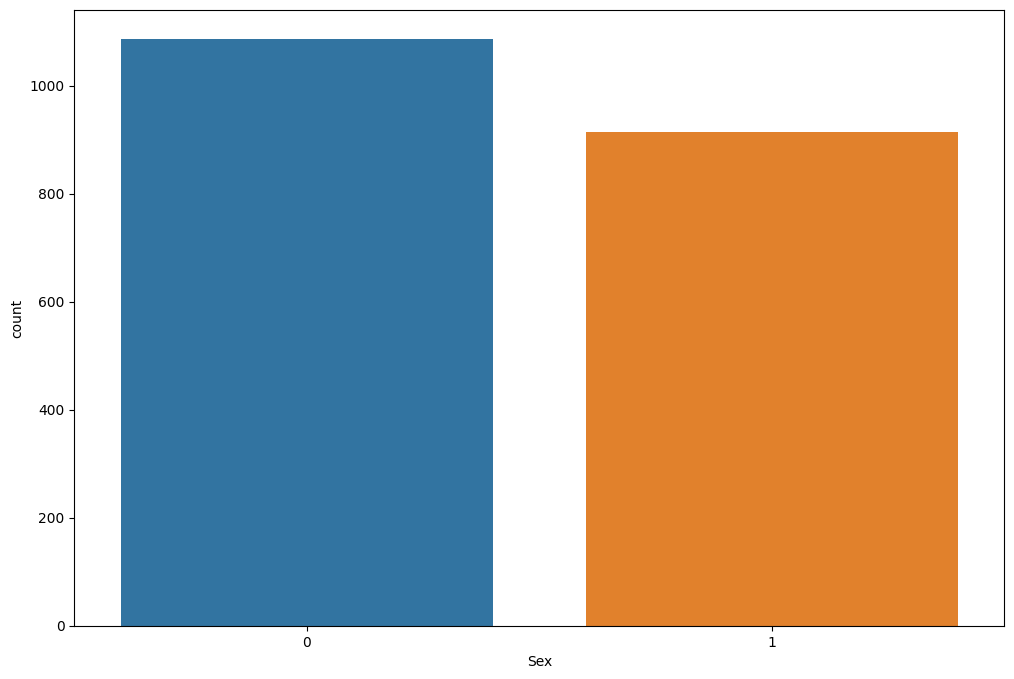

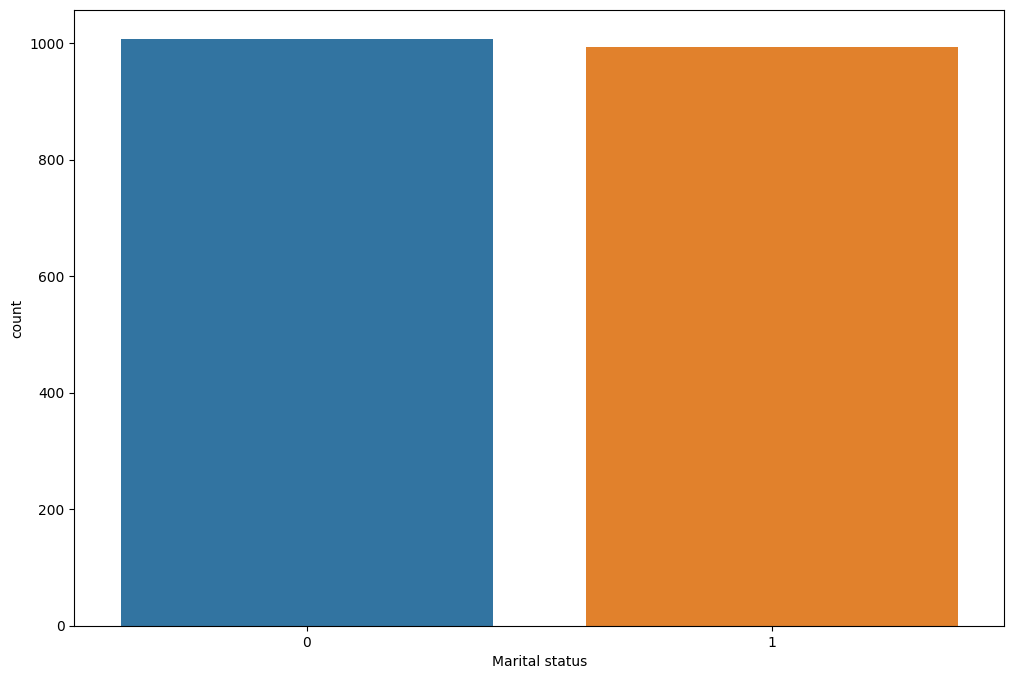

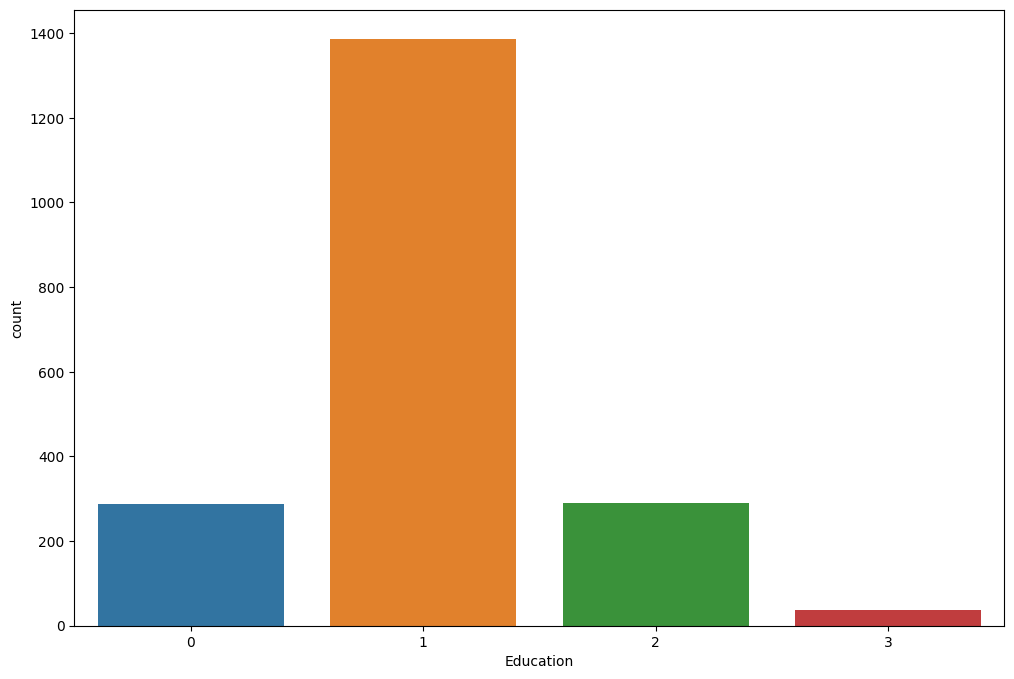

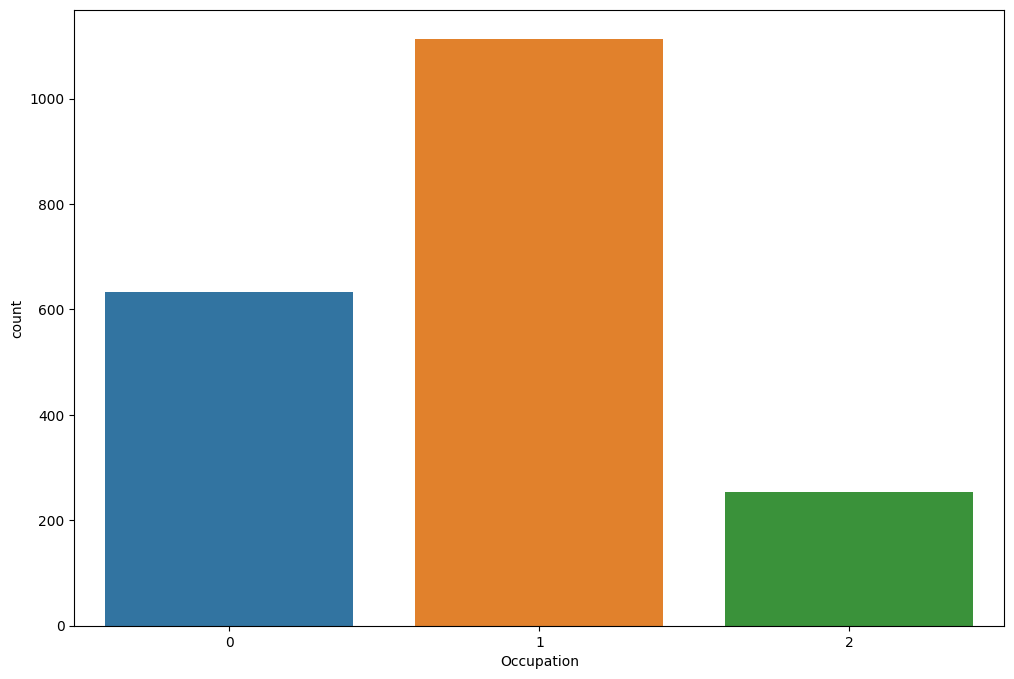

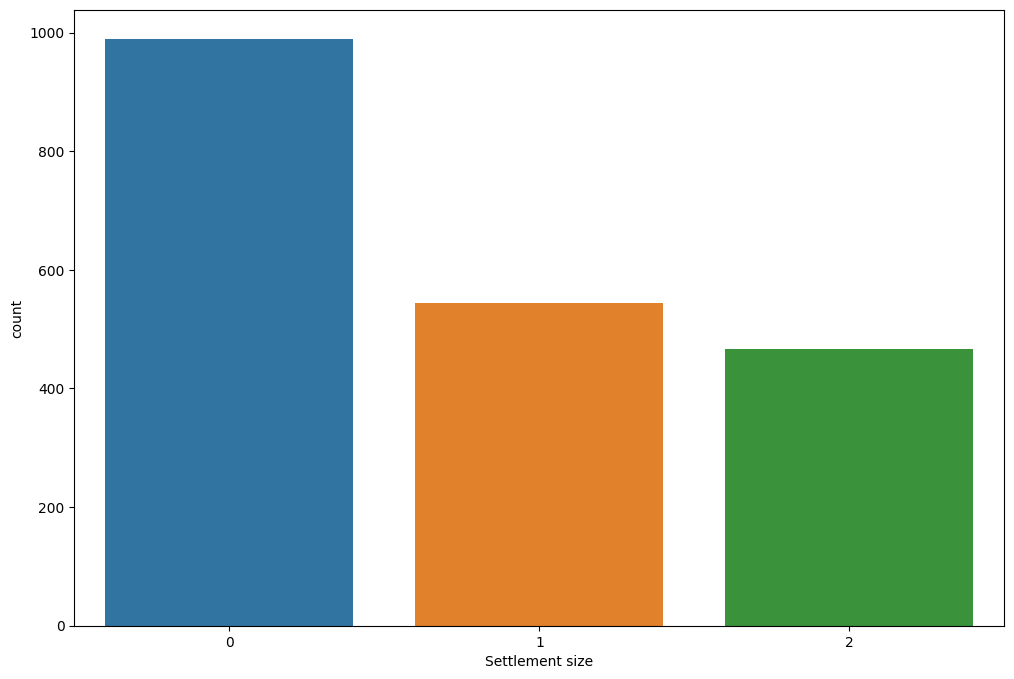

In [32]:
for col in cat_cols:
    plt.figure(figsize = (12, 8))
    sns.countplot(data=df, x=col)
    plt.show()

## Feature–Feature Relationships

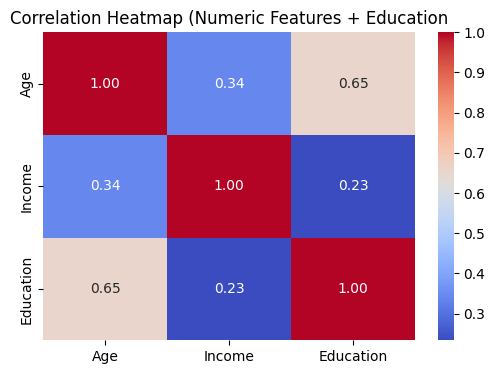

In [34]:
corr = df[num_cols + ['Education']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features + Education")
plt.show()

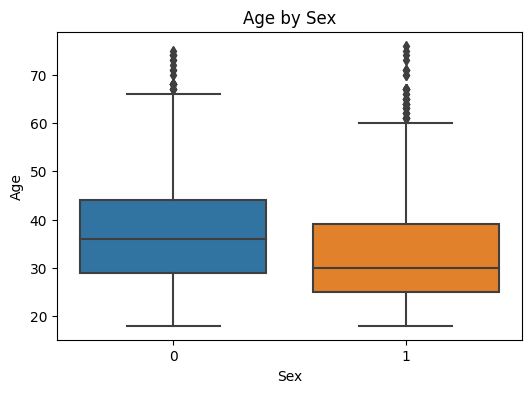

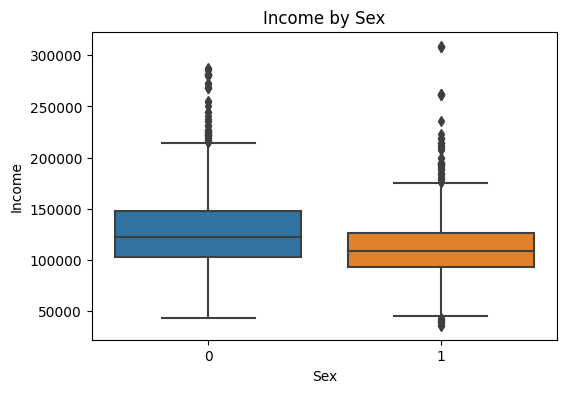

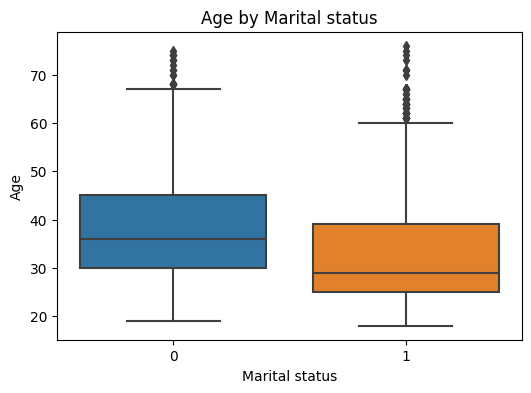

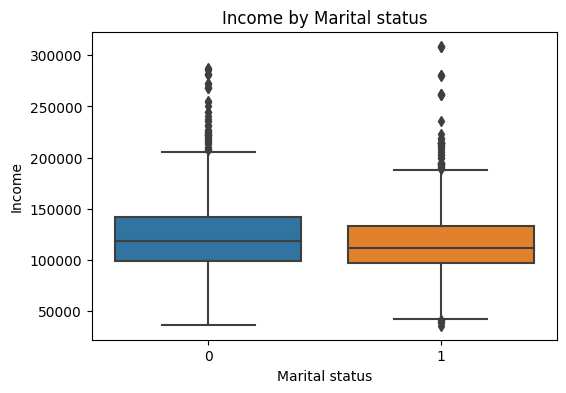

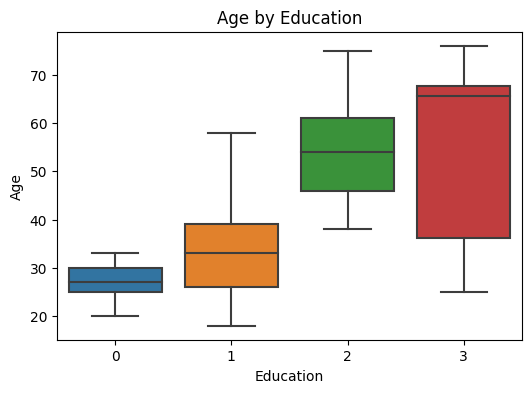

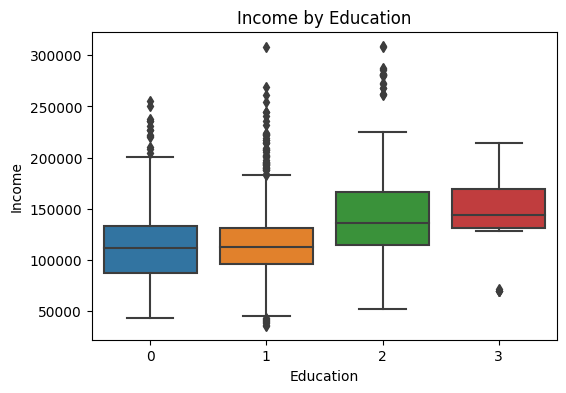

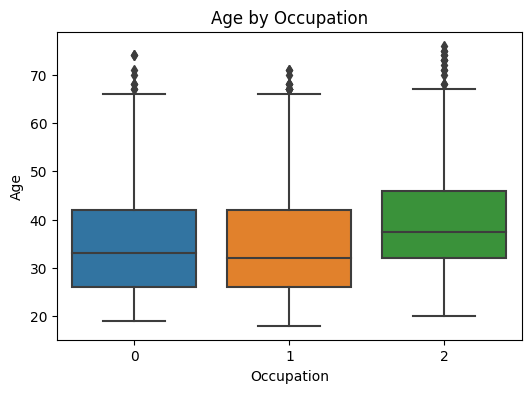

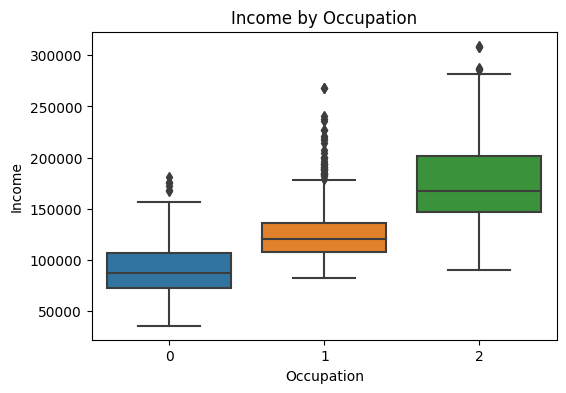

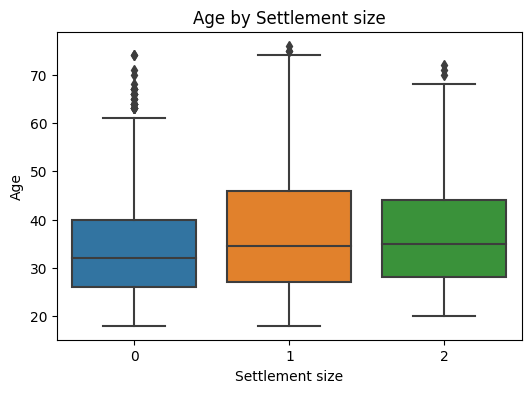

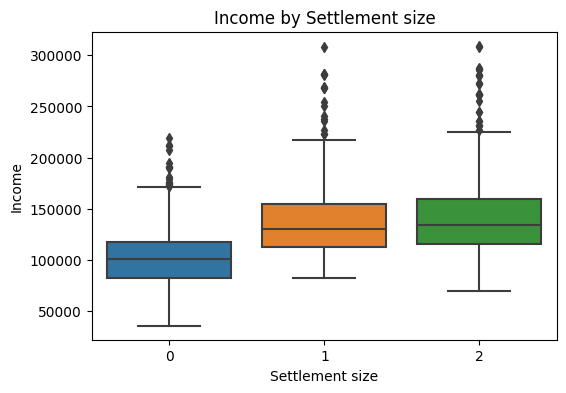

In [35]:
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} by {cat}")
        plt.show()

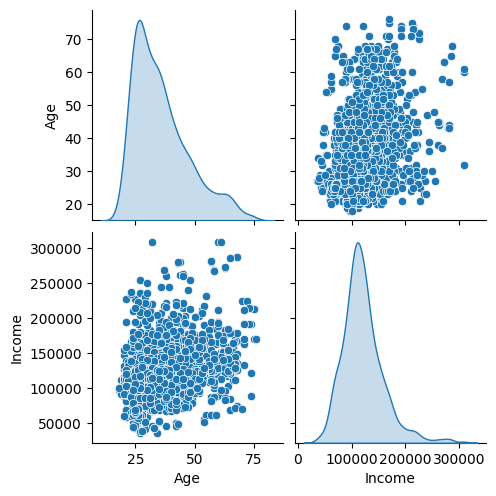

In [36]:
sns.pairplot(df[num_cols], diag_kind='kde')
plt.show()